## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [556]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [557]:
def get_data(data_path: str):
  data = pd.read_csv(data_path, index_col=0)
  
  return data

In [558]:
data_path = 'motorbike_ambulance_calls.csv'
data = get_data(data_path)

stats = data.describe()
print(stats)

max_values = data.max()
min_values = data.min()

print("\nMax values:")
print(max_values)

print("\nMin values:")
print(min_values)

dimension = data.shape
print("\nDataset dimension:", dimension)


                 yr          mnth            hr       holiday       weekday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.502561      6.537775     11.546752      0.028770      3.003683   
std        0.500008      3.438776      6.914405      0.167165      2.005771   
min        0.000000      1.000000      0.000000      0.000000      0.000000   
25%        0.000000      4.000000      6.000000      0.000000      1.000000   
50%        1.000000      7.000000     12.000000      0.000000      3.000000   
75%        1.000000     10.000000     18.000000      0.000000      5.000000   
max        1.000000     12.000000     23.000000      1.000000      6.000000   

         workingday    weathersit          temp         atemp           hum  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.682721      1.425283      0.496987      0.475775      0.627229   
std        0.465431      0.639357      0.192556    

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [559]:
data_types = data.dtypes
print("Data types check:")
print(data_types)

data_counts = data.count()
print("\nData counts check:")
print(data_counts)

Data types check:
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

Data counts check:
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64


**Завдання 3** перевірте всі змінні на наявність пропусків.

In [560]:
missing_values = data.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Висновки з 1-3 завдання (детальні)**



1.   Було завантажено вибірку 'motorbike_ambulance_calls.csv', яка містить інформацію про кількість викликів швидкої допомоги, виведено основну статистичну інформацію (середнє значення, стандартне відхилення, мінімум, максимум, квартилі) по числовим змінним, максимальні та мінімальні значення по всім змінним і розмірність датасету. Розмірність датасету - 17379 значень на 14 колонок.

2.   Після перевірки типів даних і їх кількість у кожній змінній, можна зробити висновок що вибірка переважно складається з даних числового типу(int64 і float64), але такі змінні як сезон і дата є рядковими значеннями. У кожній змінній кількість даних дорівнює 17379.

3.   Згідно висновків до завдання 2 можна зрозуміти, що кожна змінна містить 17379 даних, тобто, пропущених значень немає, але здійснивши перевірку на пропущені значення можна точно переконатися в цьому. Відсутність пропущених значень робить аналіз більш точним.



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [561]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name], format='%m/%d/%y')
  return df
  
data = tranform_date(data, 'date')


In [562]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].min()
  last_day = df[date_col_name].max()
  print(f"First day - {first_day}\nLast day - {last_day}")
  
get_time_limits(data, 'date')

First day - 2011-01-01 00:00:00
Last day - 2012-12-31 00:00:00


Після перетворення змінної ```date``` в date type, можна проаналізувати часові межі датасету(перший день і останній). Згідно перевірки, початок - 1 січня 2011 року о 00:00:00, а кінець - 31 грудня 2012 року о 00:00:00.

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [582]:
data_categorical = data[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']].copy()

print("Categorical variables dataset:")
print(data_categorical.head(24))

Categorical variables dataset:
       season  yr  mnth  hr  holiday  weekday  workingday  weathersit
index                                                                
1           1   0     1   0        0        6           0           1
2           1   0     1   1        0        6           0           1
3           1   0     1   2        0        6           0           1
4           1   0     1   3        0        6           0           1
5           1   0     1   4        0        6           0           1
6           1   0     1   5        0        6           0           2
7           1   0     1   6        0        6           0           1
8           1   0     1   7        0        6           0           1
9           1   0     1   8        0        6           0           1
10          1   0     1   9        0        6           0           1
11          1   0     1  10        0        6           0           1
12          1   0     1  11        0        6           0  

**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [564]:
def encode_season(df: pd.DataFrame, season_col_name: str):
  df[season_col_name] = df[season_col_name].map({'spring': 1, 'summer': 2, 'autumn': 3, 'winter': 4})
  return df
  
data = encode_season(data, 'season')

**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

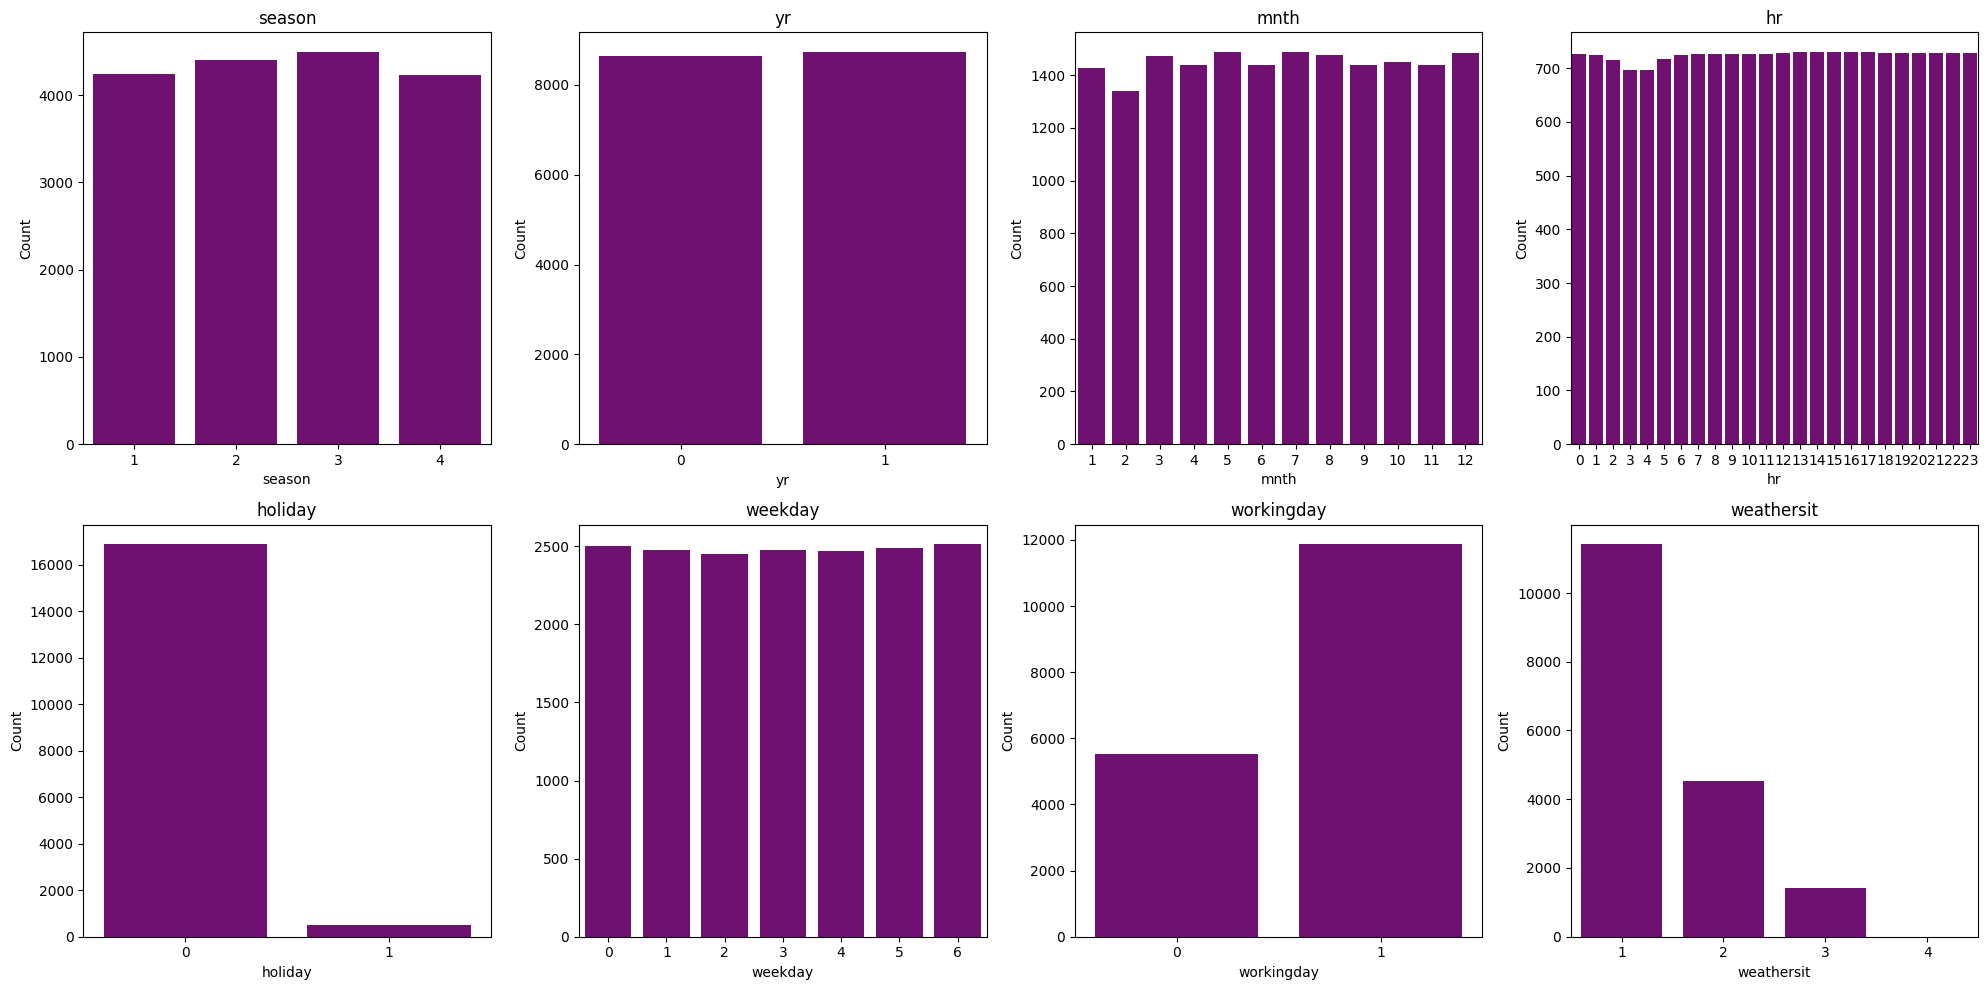

In [583]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical, ax.flatten()):
  sns.countplot(x=variable, data=data_categorical, ax=subplot, color="purple")
  subplot.set_title(variable)
  subplot.set_xlabel(variable)
  subplot.set_ylabel('Count')

plt.tight_layout()
plt.show()

**Висновки з 5-7 завдання (детальні)**



1.   Було відокремлено категоріальні змінні від числових значень, категоріальні змінні встановлені заздалегідь і не можуть залежати від чогось, для прикладу, у нас є змінна 'день тижня', яка складається з 7 цифр (від 0 до 6), де кожна цифра відповідає певному дню відповідно.

2.   Перетворення змінної ```season``` в числову шкалу спрощує аналіз як для категоріальної змінної. Пори року були замінені на 1 - весна, 2 - літо, 3 - осінь і 4 - зима відповідно.

3.   Було побудовано 8 графіків до кожної категоріальної змінної. Якщо проаналізувати кожен, то найчастіше виклики швидкої допомоги були у звичайні дні(не святкові), робочі дні, дні з хорошою погодою.


#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [566]:
data_numerical = data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].copy()

print("Numerical variables dataset:")
print(data_numerical.head(15))

Numerical variables dataset:
       temp   atemp   hum  windspeed  cnt
index                                    
1      0.24  0.2879  0.81     0.0000   16
2      0.22  0.2727  0.80     0.0000   40
3      0.22  0.2727  0.80     0.0000   32
4      0.24  0.2879  0.75     0.0000   13
5      0.24  0.2879  0.75     0.0000    1
6      0.24  0.2576  0.75     0.0896    1
7      0.22  0.2727  0.80     0.0000    2
8      0.20  0.2576  0.86     0.0000    3
9      0.24  0.2879  0.75     0.0000    8
10     0.32  0.3485  0.76     0.0000   14
11     0.38  0.3939  0.76     0.2537   36
12     0.36  0.3333  0.81     0.2836   56
13     0.42  0.4242  0.77     0.2836   84
14     0.46  0.4545  0.72     0.2985   94
15     0.46  0.4545  0.72     0.2836  106


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

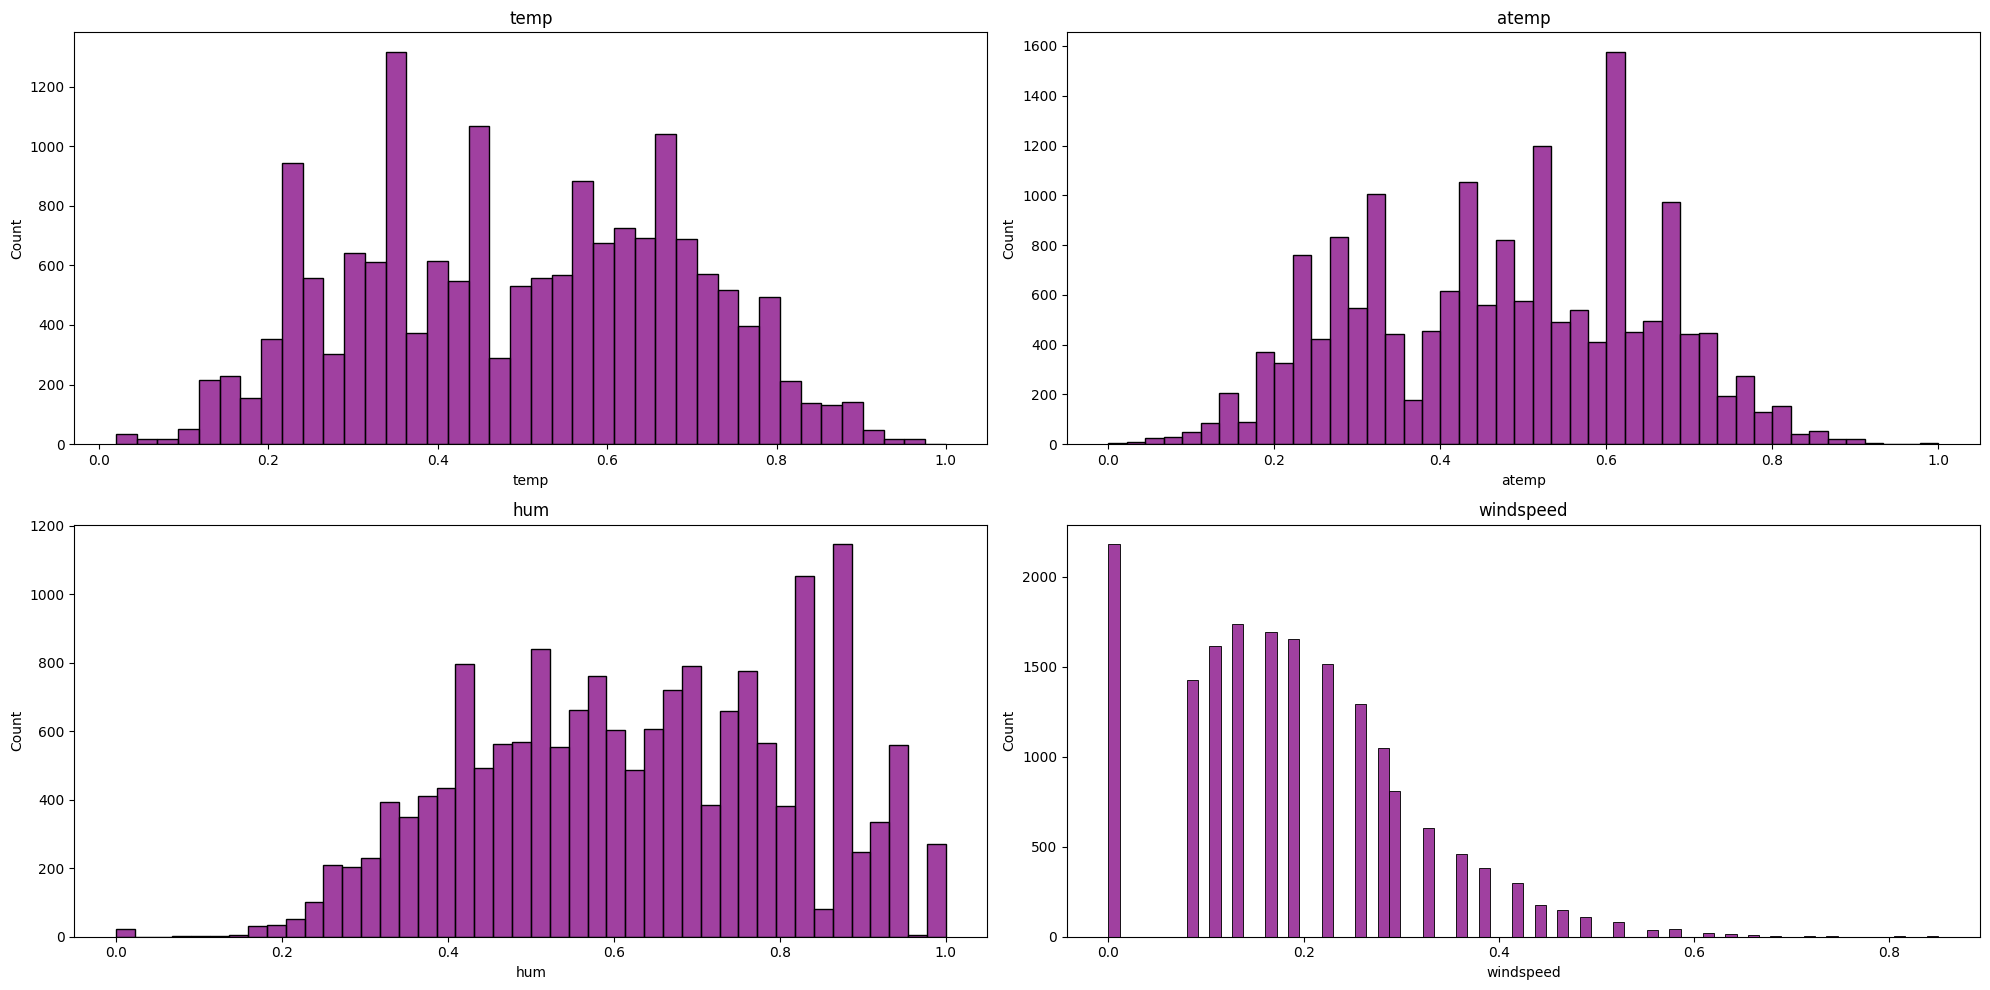

In [567]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

for i, variable in enumerate(data_numerical.columns[:-1]):
    sns.histplot(data_numerical[variable], ax=ax.flatten()[i], color="purple")
    ax.flatten()[i].set_title(variable)
    ax.flatten()[i].set_xlabel(variable)
    ax.flatten()[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

Skewness coefficient:  1.2774116037490577


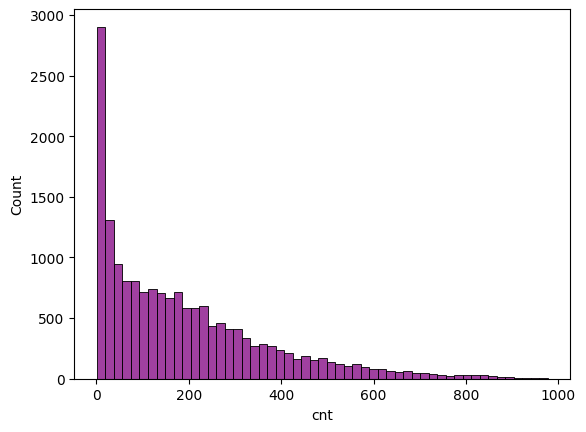

In [568]:
sns.histplot(data['cnt'], color="purple")
skew_coefficient = data['cnt'].skew()
print("Skewness coefficient: ", skew_coefficient)
plt.show()

**Висновки з 8-10 завдання (детальні)**



1.   Було виділено 4 числові змінні в окремий датасет, хоча змінна ```atemp``` вважається непотрібною, бо вона означає температуру по відчуттях, яку кожен відчуває її по різному.

2.   Після побудови гістаграм розподілів, які переважно є біномінальними(також наявний екпоненціальний), можна визначити, що найбільше викликів було за помірної температури, але по відчуттях дещо вищої, високої вологості, нульової швидкості вітру.

3.   Отриманий коефіцієнт нахилу є більшим 0, що означає що більшість наших даних зосереджена ліворуч від середнього значення. Крім того, це свідчить про наявність довгого хвоста праворуч, який вказує на наявність викидів у данних.



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

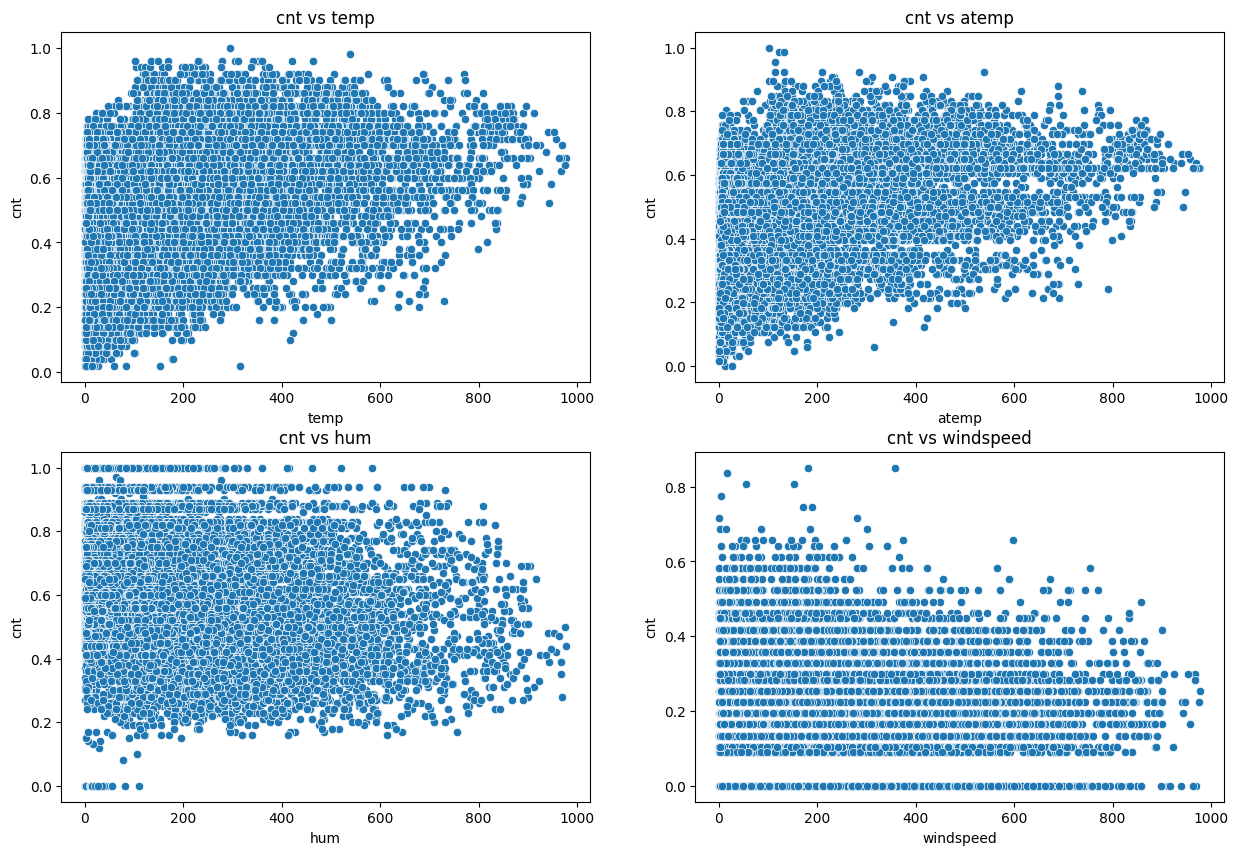

In [569]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for var, subplot in zip(data_numerical.drop('cnt', axis =1), ax.flatten()):
  sns.scatterplot(x='cnt', y=var, data=data_numerical, ax=subplot)
  subplot.set_title(f'cnt vs {var}')
  subplot.set_xlabel(var)
  subplot.set_ylabel('cnt')

plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

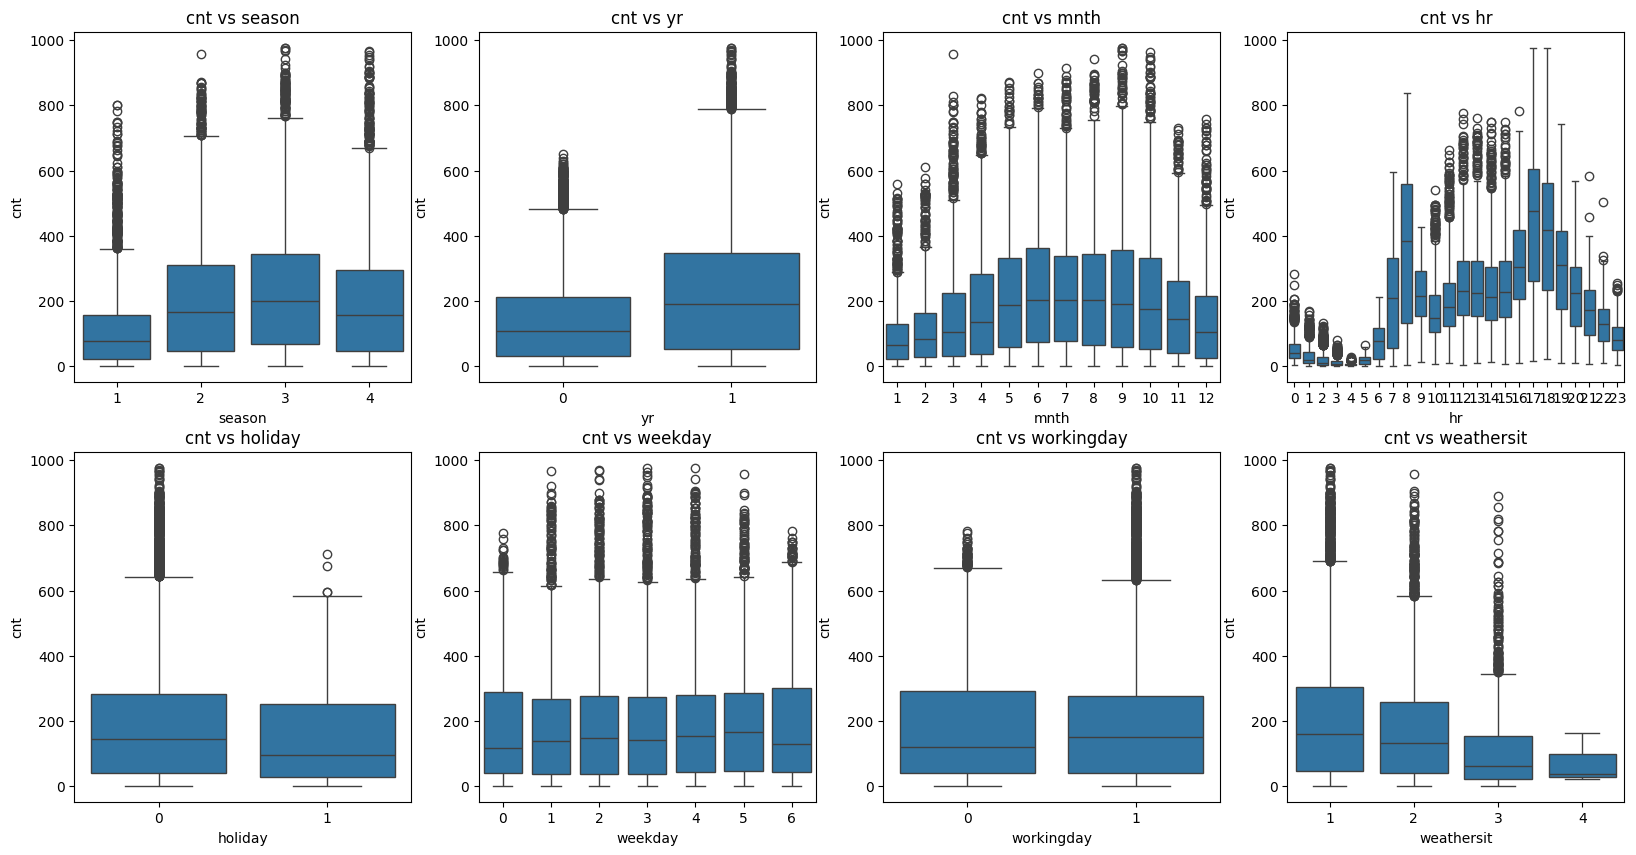

In [570]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
  sns.boxplot(x=var , y= 'cnt', data=data, ax= subplot)
  subplot.set_title(f'cnt vs {var}')
  subplot.set_xlabel(var)
  subplot.set_ylabel('cnt')

plt.show()

**Висновки з 11-12 завдання (детальні)**



1.   Після побудови графіків співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`, можна побачити що кількість викликів збільшувалася при високій температурі повітря, швидкість вітру ніяк не впливала на частоту викликів, крім того, за відсутності вітру викликів було набагато більше.

2.   Після побудови графіків співвідношення `boxplot` між категоріальними змінними і цільовою змінною `cnt`, можна побачити що значна різниця є у змінній `hr`, де виклики швидкої найчастіше були в період дороги на(з) роботу(и). Більше викликів було в 2012 році, якщо говорити про пори року, то найчастіше це було літом і весною. Зазвичай у погану погоду ніхто не їздить на мотоциклі, тому маємо більше викликів у гарну погоду.

3.   :D


**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

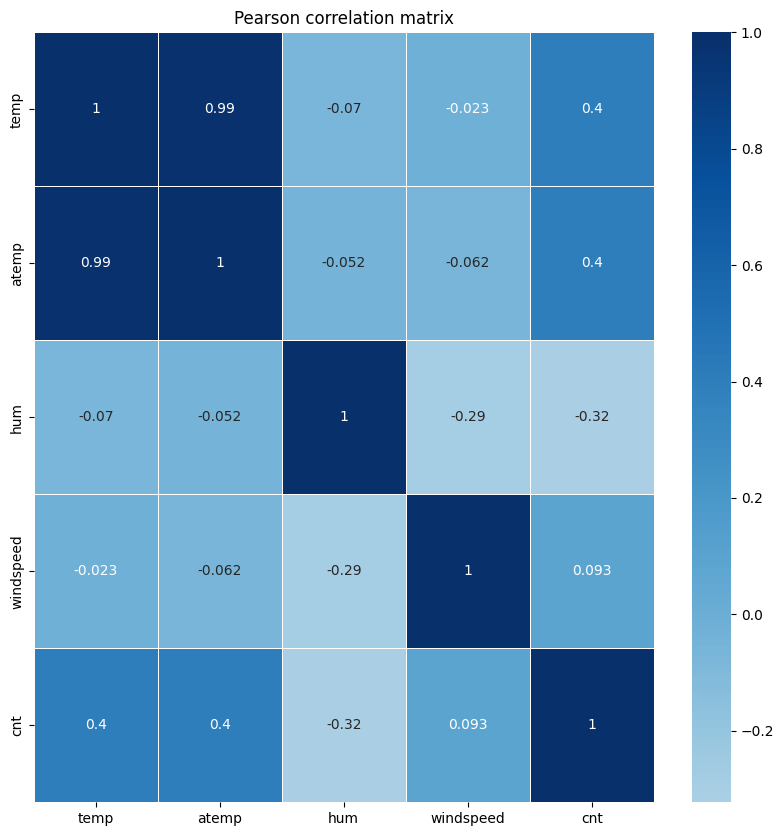

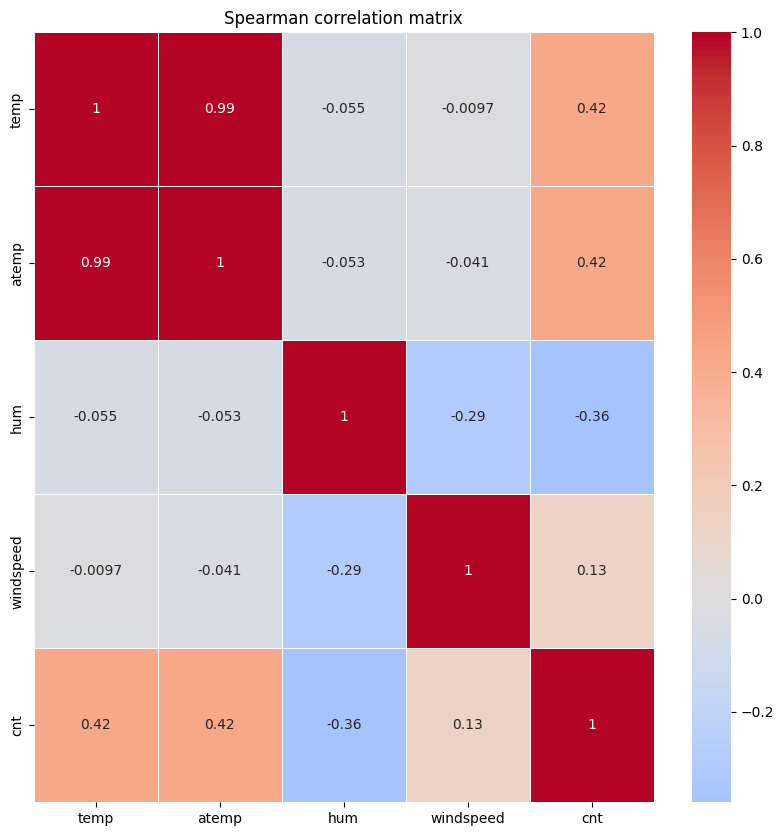

In [571]:
corr_coef_pearson = data_numerical.corr(method='pearson')
corr_coef_spearman = data_numerical.corr(method='spearman')

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_coef_pearson, annot=True, cmap='Blues', center=0, linewidths=0.7, ax=ax)
ax.set_title("Pearson correlation matrix")
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_coef_spearman, annot=True, cmap='coolwarm', center=0, linewidths=0.7, ax=ax)
ax.set_title("Spearman correlation matrix")
plt.show()

In [572]:
print("Pearson correlation matrix:")
print(corr_coef_pearson)

print("\nSpearman correlation matrix:")
print(corr_coef_spearman)

Pearson correlation matrix:
               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.987672 -0.069881  -0.023125  0.404772
atemp      0.987672  1.000000 -0.051918  -0.062336  0.400929
hum       -0.069881 -0.051918  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.062336 -0.290105   1.000000  0.093234
cnt        0.404772  0.400929 -0.322911   0.093234  1.000000

Spearman correlation matrix:
               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.989633 -0.055408  -0.009719  0.423330
atemp      0.989633  1.000000 -0.052617  -0.041091  0.423258
hum       -0.055408 -0.052617  1.000000  -0.293913 -0.359614
windspeed -0.009719 -0.041091 -0.293913   1.000000  0.126629
cnt        0.423330  0.423258 -0.359614   0.126629  1.000000


Коефіцієнт кореляції Пірсона використовується для вимірювання `лінійного` зв’язку між двома змінними, а коефіцієнт кореляції Спірмена - `монотонного` зв’язку. Коефіцієнт кореляції Пірсона більш чутливий до викидів у порівнянні з коефіцієнтом кореляції Спірмена.

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [573]:
def get_dummies(df: pd.DataFrame):
  features = pd.concat([df,
                      pd.get_dummies(df['season']),
                      pd.get_dummies(df['mnth']),
                      pd.get_dummies(df['weekday']),
                      pd.get_dummies(df['weathersit']),
                      ], axis = 1
                     )
  features = features.drop(['season',
                            'mnth', 
                            'weekday', 
                            'weathersit'
                            ], axis = 1)
  return features

In [574]:
features = get_dummies(data)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [575]:
features['night_hours'] = (data['hr'] >= 22) | (data['hr'] <= 5)
features = features.drop('hr', axis = 1)

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [576]:
features_lr = features.drop(['atemp', 'date'], axis = 1)

In [577]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = df.drop(target, axis = 1)
  y = df[target]
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [578]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [579]:
def train_linear_model(X_train, y_train):
  X_train.columns = X_train.columns.astype(str)
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [580]:
# predict
y_train_pred = model.predict(X_train)
X_test.columns = X_test.columns.astype(str)
y_test_pred = model.predict(X_test)

# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 16171.096, test: 15536.991
R^2 train: 0.517, test: 0.508


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

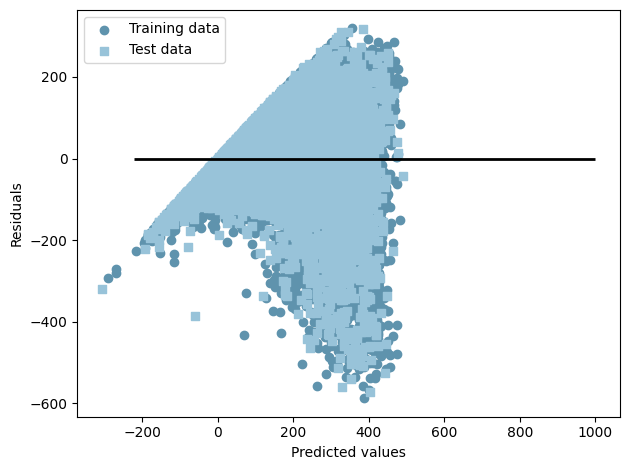

In [581]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**


1.   Після побудови графіку, можна побачити, що Training data буде давати більш точну оцінку ніж Test data.

2.   Після обчислень R^2 train можна побачити, що модель буде давати правильну оцінку в 51.7% випадків.

3.   Було видалено змінну `date` і `atemp`, тому що `date` не є необхідною для даної моделі, а змінну atemp лише викликає мультиколінеарність із зміною `temp`. Крім того, як було зазначено раніше, `atemp` - це температура по відчуттях, що є неточним через той факт, що кожен відчуває її по різному.


